In [33]:
import requests

url = "https://covid-193.p.rapidapi.com/statistics"

headers = {
    'x-rapidapi-host': "covid-193.p.rapidapi.com",
    'x-rapidapi-key': "4c45b510edmsh50b6e31b93be889p1ae7adjsn575de8df18c3"
    }

response = requests.request("GET", url, headers=headers)


data =response.json()



In [74]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader

# For time stamps
from datetime import datetime



C:\Users\hp\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\hp\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\hp\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


ModuleNotFoundError: No module named 'pandas.io.data'

{'get': 'statistics', 'parameters': [], 'errors': [], 'results': 224, 'response': [{'country': 'China', 'cases': {'new': '+3', 'active': 723, 'critical': 52, 'recovered': 77474, 'total': 82830}, 'deaths': {'new': '+1', 'total': 4633}, 'tests': {'total': None}, 'day': '2020-04-27', 'time': '2020-04-27T17:15:17+00:00'}, {'country': 'Italy', 'cases': {'new': '+1739', 'active': 105813, 'critical': 1956, 'recovered': 66624, 'total': 199414}, 'deaths': {'new': '+333', 'total': 26977}, 'tests': {'total': 1789662}, 'day': '2020-04-27', 'time': '2020-04-27T17:15:17+00:00'}, {'country': 'Spain', 'cases': {'new': '+2793', 'active': 85069, 'critical': 7764, 'recovered': 120832, 'total': 229422}, 'deaths': {'new': '+331', 'total': 23521}, 'tests': {'total': 1345560}, 'day': '2020-04-27', 'time': '2020-04-27T17:15:17+00:00'}, {'country': 'USA', 'cases': {'new': '+8128', 'active': 816474, 'critical': 15143, 'recovered': 122675, 'total': 995288}, 'deaths': {'new': '+726', 'total': 56139}, 'tests': {'t

In [37]:
print(data['response'])

[{'country': 'China', 'cases': {'new': '+3', 'active': 723, 'critical': 52, 'recovered': 77474, 'total': 82830}, 'deaths': {'new': '+1', 'total': 4633}, 'tests': {'total': None}, 'day': '2020-04-27', 'time': '2020-04-27T17:15:17+00:00'}, {'country': 'Italy', 'cases': {'new': '+1739', 'active': 105813, 'critical': 1956, 'recovered': 66624, 'total': 199414}, 'deaths': {'new': '+333', 'total': 26977}, 'tests': {'total': 1789662}, 'day': '2020-04-27', 'time': '2020-04-27T17:15:17+00:00'}, {'country': 'Spain', 'cases': {'new': '+2793', 'active': 85069, 'critical': 7764, 'recovered': 120832, 'total': 229422}, 'deaths': {'new': '+331', 'total': 23521}, 'tests': {'total': 1345560}, 'day': '2020-04-27', 'time': '2020-04-27T17:15:17+00:00'}, {'country': 'USA', 'cases': {'new': '+8128', 'active': 816474, 'critical': 15143, 'recovered': 122675, 'total': 995288}, 'deaths': {'new': '+726', 'total': 56139}, 'tests': {'total': 5578824}, 'day': '2020-04-27', 'time': '2020-04-27T17:15:17+00:00'}, {'coun

In [51]:
country_list = data['response']


In [52]:
country_list

[{'country': 'China',
  'cases': {'new': '+3',
   'active': 723,
   'critical': 52,
   'recovered': 77474,
   'total': 82830},
  'deaths': {'new': '+1', 'total': 4633},
  'tests': {'total': None},
  'day': '2020-04-27',
  'time': '2020-04-27T17:15:17+00:00'},
 {'country': 'Italy',
  'cases': {'new': '+1739',
   'active': 105813,
   'critical': 1956,
   'recovered': 66624,
   'total': 199414},
  'deaths': {'new': '+333', 'total': 26977},
  'tests': {'total': 1789662},
  'day': '2020-04-27',
  'time': '2020-04-27T17:15:17+00:00'},
 {'country': 'Spain',
  'cases': {'new': '+2793',
   'active': 85069,
   'critical': 7764,
   'recovered': 120832,
   'total': 229422},
  'deaths': {'new': '+331', 'total': 23521},
  'tests': {'total': 1345560},
  'day': '2020-04-27',
  'time': '2020-04-27T17:15:17+00:00'},
 {'country': 'USA',
  'cases': {'new': '+8128',
   'active': 816474,
   'critical': 15143,
   'recovered': 122675,
   'total': 995288},
  'deaths': {'new': '+726', 'total': 56139},
  'tests'

In [54]:
print(country_list[1]['cases']['new'])
print(len(country_list))

+1739
224


In [68]:
country_stat =[]
for i in range(0,len(country_list)):
    country_stat.append([country_list[i]['country'],country_list[i]['cases']['new'],country_list[i]['cases']['active'],country_list[i]['cases']['critical'],country_list[i]['cases']['recovered'],
                       country_list[i]['cases']['total'],country_list[i]['deaths']['new'],country_list[i]['deaths']['total'],country_list[i]['tests']['total'],
                        country_list[i]['day'],country_list[i]['time']])
    

In [69]:
covid_df = pd.DataFrame(country_stat)

In [70]:
covid_df

,0,1,2,3,4,5,6,7,8,9,10
0,China,+3,723,52,77474,82830,+1,4633,NaN,2020-04-27,2020-04-27T17:15:17+00:00
1,Italy,+1739,105813,1956,66624,199414,+333,26977,1789662.0,2020-04-27,2020-04-27T17:15:17+00:00
2,Spain,+2793,85069,7764,120832,229422,+331,23521,1345560.0,2020-04-27,2020-04-27T17:15:17+00:00
3,USA,+8128,816474,15143,122675,995288,+726,56139,5578824.0,2020-04-27,2020-04-27T17:15:17+00:00
4,Germany,+372,37657,2570,114500,158142,+9,5985,2072669.0,2020-04-27,2020-04-27T17:15:17+00:00
...,...,...,...,...,...,...,...,...,...,...,...
219,South-America,+1045,82660,9708,49975,138965,+41,6330,NaN,2020-04-27,2020-04-27T17:15:17+00:00
220,Oceania,+4,1350,46,6838,8290,+1,102,NaN,2020-04-27,2020-04-27T17:15:17+00:00
221,Africa,+628,21567,140,10259,33285,+32,1459,NaN,2020-04-27,2020-04-27T17:15:17+00:00
222,Diamond-Princess,None,54,4,645,712,None,13,NaN,2020-04-27,2020-04-27T17:15:17+00:00


In [ ]:

[{'country': 'China',
  'cases': {'new': '+3',
   'active': 723,
   'critical': 52,
   'recovered': 77474,
   'total': 82830},
  'deaths': {'new': '+1', 'total': 4633},
  'tests': {'total': None},
  'day': '2020-04-27',
  'time': '2020-04-27T17:15:17+00:00'},

In [71]:
covid_df.columns=['country','new_cases','active_cases','critical_cases','recovered_cases','total_cases','new_deaths','total_deaths','total_test','day','time']

In [72]:
covid_df.head()

,country,new_cases,active_cases,critical_cases,recovered_cases,total_cases,new_deaths,total_deaths,total_test,day,time
0,China,+3,723,52,77474,82830,+1,4633,NaN,2020-04-27,2020-04-27T17:15:17+00:00
1,Italy,+1739,105813,1956,66624,199414,+333,26977,1789662.0,2020-04-27,2020-04-27T17:15:17+00:00
2,Spain,+2793,85069,7764,120832,229422,+331,23521,1345560.0,2020-04-27,2020-04-27T17:15:17+00:00
3,USA,+8128,816474,15143,122675,995288,+726,56139,5578824.0,2020-04-27,2020-04-27T17:15:17+00:00
4,Germany,+372,37657,2570,114500,158142,+9,5985,2072669.0,2020-04-27,2020-04-27T17:15:17+00:00


In [75]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 11 columns):
country            224 non-null object
new_cases          174 non-null object
active_cases       224 non-null int64
critical_cases     224 non-null int64
recovered_cases    224 non-null int64
total_cases        224 non-null int64
new_deaths         101 non-null object
total_deaths       224 non-null int64
total_test         173 non-null float64
day                224 non-null object
time               224 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 19.4+ KB


In [91]:
covid_df.sort_values('total_cases', ascending=False)

,country,new_cases,active_cases,critical_cases,recovered_cases,total_cases,new_deaths,total_deaths,total_test,day,time
189,All,+33930,1922392,57461,895668,3027192,+2217,209132,NaN,2020-04-27,2020-04-27T17:15:17+00:00
217,Europe,+15345,723768,25140,445377,1292153,+1123,123008,NaN,2020-04-27,2020-04-27T17:15:17+00:00
216,North-America,+9967,861858,16406,151911,1074570,+846,60801,NaN,2020-04-27,2020-04-27T17:15:17+00:00
3,USA,+8128,816474,15143,122675,995288,+726,56139,5578824.0,2020-04-27,2020-04-27T17:15:17+00:00
218,Asia,+6941,231128,6017,230663,479208,+174,17417,NaN,2020-04-27,2020-04-27T17:15:17+00:00
...,...,...,...,...,...,...,...,...,...,...,...
209,Caribbean-Netherlands,+2,5,0,0,5,None,0,110.0,2020-04-27,2020-04-27T17:15:17+00:00
215,Sao-Tome-and-Principe,+4,4,0,0,4,None,0,19.0,2020-04-27,2020-04-27T17:15:17+00:00
203,Anguilla,None,0,0,3,3,None,0,NaN,2020-04-27,2020-04-27T17:15:17+00:00
214,Saint-Pierre-Miquelon,+1,1,0,0,1,None,0,NaN,2020-04-27,2020-04-27T17:15:17+00:00


In [87]:
covid_df

,country,new_cases,active_cases,critical_cases,recovered_cases,total_cases,new_deaths,total_deaths,total_test,day,time
0,China,+3,723,52,77474,82830,+1,4633,NaN,2020-04-27,2020-04-27T17:15:17+00:00
1,Italy,+1739,105813,1956,66624,199414,+333,26977,1789662.0,2020-04-27,2020-04-27T17:15:17+00:00
2,Spain,+2793,85069,7764,120832,229422,+331,23521,1345560.0,2020-04-27,2020-04-27T17:15:17+00:00
3,USA,+8128,816474,15143,122675,995288,+726,56139,5578824.0,2020-04-27,2020-04-27T17:15:17+00:00
4,Germany,+372,37657,2570,114500,158142,+9,5985,2072669.0,2020-04-27,2020-04-27T17:15:17+00:00
...,...,...,...,...,...,...,...,...,...,...,...
219,South-America,+1045,82660,9708,49975,138965,+41,6330,NaN,2020-04-27,2020-04-27T17:15:17+00:00
220,Oceania,+4,1350,46,6838,8290,+1,102,NaN,2020-04-27,2020-04-27T17:15:17+00:00
221,Africa,+628,21567,140,10259,33285,+32,1459,NaN,2020-04-27,2020-04-27T17:15:17+00:00
222,Diamond-Princess,None,54,4,645,712,None,13,NaN,2020-04-27,2020-04-27T17:15:17+00:00


In [90]:
covid_df['country']

0                 China
1                 Italy
2                 Spain
3                   USA
4               Germany
             ...       
219       South-America
220             Oceania
221              Africa
222    Diamond-Princess
223               Yemen
Name: country, Length: 224, dtype: object

In [104]:
new_df =covid_df[ covid_df['total_cases']>100000]

In [105]:
new_df

,country,new_cases,active_cases,critical_cases,recovered_cases,total_cases,new_deaths,total_deaths,total_test,day,time
1,Italy,+1739,105813,1956,66624,199414,+333,26977,1789662.0,2020-04-27,2020-04-27T17:15:17+00:00
2,Spain,+2793,85069,7764,120832,229422,+331,23521,1345560.0,2020-04-27,2020-04-27T17:15:17+00:00
3,USA,+8128,816474,15143,122675,995288,+726,56139,5578824.0,2020-04-27,2020-04-27T17:15:17+00:00
4,Germany,+372,37657,2570,114500,158142,+9,5985,2072669.0,2020-04-27,2020-04-27T17:15:17+00:00
6,France,+612,94341,4682,44903,162100,+242,22856,463662.0,2020-04-27,2020-04-27T17:15:17+00:00
9,UK,+4463,131764,1559,0,152840,+413,20732,669850.0,2020-04-27,2020-04-27T17:15:17+00:00
23,Turkey,+2357,78185,1776,29140,110130,+99,2805,898742.0,2020-04-27,2020-04-27T17:15:17+00:00
189,All,+33930,1922392,57461,895668,3027192,+2217,209132,NaN,2020-04-27,2020-04-27T17:15:17+00:00
216,North-America,+9967,861858,16406,151911,1074570,+846,60801,NaN,2020-04-27,2020-04-27T17:15:17+00:00
217,Europe,+15345,723768,25140,445377,1292153,+1123,123008,NaN,2020-04-27,2020-04-27T17:15:17+00:00


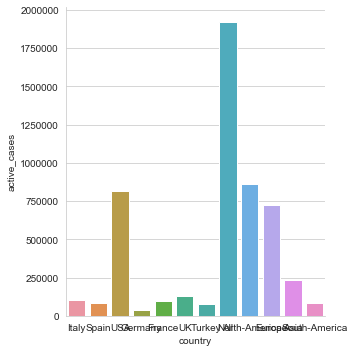

In [111]:
sns.catplot(x="country",y="active_cases",kind='bar',data=new_df )

In [103]:
covid_df.country.unique()

array(['China', 'Italy', 'Spain', 'USA', 'Germany', 'Iran', 'France',
       'S-Korea', 'Switzerland', 'UK', 'Netherlands', 'Austria',
       'Belgium', 'Norway', 'Sweden', 'Canada', 'Denmark', 'Portugal',
       'Malaysia', 'Brazil', 'Australia', 'Japan', 'Czechia', 'Turkey',
       'Israel', 'Ireland', 'Diamond-Princess-', 'Luxembourg', 'Pakistan',
       'Chile', 'Poland', 'Ecuador', 'Greece', 'Finland', 'Qatar',
       'Iceland', 'Indonesia', 'Singapore', 'Thailand', 'Saudi-Arabia',
       'Slovenia', 'Romania', 'India', 'Peru', 'Bahrain', 'Philippines',
       'Russia', 'Estonia', 'Egypt', 'Hong-Kong', 'South-Africa',
       'Lebanon', 'Iraq', 'Croatia', 'Mexico', 'Panama', 'Colombia',
       'Slovakia', 'Kuwait', 'Serbia', 'Bulgaria', 'San-Marino',
       'Armenia', 'Argentina', 'Taiwan', 'UAE', 'Algeria', 'Latvia',
       'Costa-Rica', 'Dominican-Republic', 'Uruguay', 'Hungary', 'Jordan',
       'Lithuania', 'Morocco', 'Vietnam', 'Bosnia-and-Herzegovina',
       'Faeroe-Islands'